# This notebook will be used for the IBM Data Science Capstone Project 

# Week 2
## Data Description & EDA

In this initial notebook, I will introduce the data that will be used for the IBM Data Science Capstone Project and conduct an initial exploratory data analysis.
The data that will be used in this assignment is the UK STATS19 Road Safety Data for 2018 (data.gov.uk).

## Initialization
First, lets import the necessary libraries and upload the data into the IBM Watson project.

In [1]:
#imports 
#The CSV file of the 2018 Accident data has already been uploaded locally to IBM Watson under Accidents_2018.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

!pip install --upgrade pixiedust
import pixiedust

%matplotlib inline

Requirement already up-to-date: pixiedust in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.1.18)
Pixiedust database opened successfully


In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [3]:
print ('The dataset has {:3,d} samples and {} features'.format(*df.shape))

The dataset has 122,635 samples and 32 features


# Removal of Irrelevant Dataset Features

The dataset is large and contains certain features which will be irrelevant for the analysis. For example, location coordinates are provided as well as OSGR location data. The regular coordinates will be easier to use, and therefore the OSGR data can be removed. Same counts for the LSOA data.



In [4]:
drop = ['Location_Easting_OSGR', 'Location_Northing_OSGR' , 'Did_Police_Officer_Attend_Scene_of_Accident' , 'LSOA_of_Accident_Location']
df.drop(drop, axis=1, inplace = True)
df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,2018010080971,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,...,-1,0,0,0,4,1,1,0,0,1
1,2018010080973,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,...,6,0,0,0,4,1,1,0,0,1
2,2018010080974,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,...,5,0,0,5,4,1,1,0,0,1
3,2018010080981,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,...,3,124,0,5,4,2,2,0,0,1
4,2018010080982,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,...,-1,0,0,0,4,1,2,0,0,1


The Longitude and Latitude data is of upmost importance for this assignment. Therefore it is necessary to drop and data samples missing this feature.

In [5]:
df.dropna(subset=["Latitude" , "Longitude"], inplace = True)

# Features 

Now lets have a closer look at some of the features. In order to do this, I will make use of the pixiedust API. This is a useful API for creating quick and easy visualizations of data.

Accident Severity is defined in STATS19 as follows:

1 Fatal

2 Serious

3 Slight

In [6]:
from pixiedust.display import *


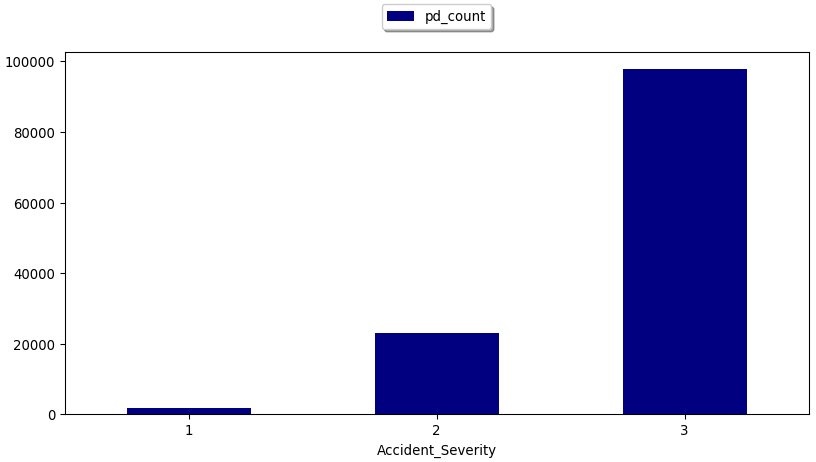

In [7]:
display(df)

# Co-Relation Between Variables?

For this assignment it is of course interesting to discover if there are any co-relations between variables. This is especially useful and necessary in order to create a Machine Learning Solution.

In [8]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.corr(method ='pearson') 

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
Longitude,1.000000,-0.442823,-0.376277,0.030764,0.019025,-0.030810,0.005405,-0.399130,-0.004036,-0.140733,...,0.049442,-0.043650,-0.048701,0.047038,0.016194,-0.006789,-0.079269,-0.027984,-0.022777,-0.110250
Latitude,-0.442823,1.000000,0.156838,-0.036678,-0.025857,0.024974,0.000814,0.120365,0.018591,0.061596,...,-0.042207,0.022975,0.043186,-0.026531,-0.017540,0.018318,0.075871,0.023494,0.015476,0.048407
Police_Force,-0.376277,0.156838,1.000000,-0.050825,0.018765,0.037115,-0.002263,0.981283,0.033410,0.020868,...,-0.095879,0.000551,0.067347,-0.108934,-0.004125,-0.038884,0.108951,0.030402,0.036392,0.267739
Accident_Severity,0.030764,-0.036678,-0.050825,1.000000,0.064968,-0.073066,0.005065,-0.053542,0.017985,-0.019357,...,0.050639,0.014753,-0.026677,0.008337,-0.050742,0.031150,-0.008349,-0.010049,-0.010728,-0.091677
Number_of_Vehicles,0.019025,-0.025857,0.018765,0.064968,1.000000,0.221036,0.000455,0.022484,-0.130730,-0.006728,...,0.037719,0.014228,-0.008890,-0.060660,-0.068472,-0.033745,-0.034827,-0.004982,-0.027211,0.067999
Number_of_Casualties,-0.030810,0.024974,0.037115,-0.073066,0.221036,1.000000,-0.003207,0.043399,-0.090514,0.009675,...,-0.035823,0.002588,0.013548,-0.031745,0.022690,-0.022957,0.022867,0.012574,0.007386,0.133990
Day_of_Week,0.005405,0.000814,-0.002263,0.005065,0.000455,-0.003207,1.000000,-0.002629,0.010286,0.000388,...,0.010217,-0.001676,-0.001142,0.003794,0.011176,0.007088,0.002532,-0.003166,-0.001695,-0.019117
Local_Authority_(District),-0.399130,0.120365,0.981283,-0.053542,0.022484,0.043399,-0.002629,1.000000,0.043857,0.033108,...,-0.098540,0.003616,0.071928,-0.118900,-0.005956,-0.043190,0.111558,0.031651,0.036097,0.284525
1st_Road_Class,-0.004036,0.018591,0.033410,0.017985,-0.130730,-0.090514,0.010286,0.043857,1.000000,-0.191566,...,0.087024,-0.052818,0.000825,-0.103111,-0.036353,0.005688,-0.003325,-0.020853,-0.007245,-0.216548
1st_Road_Number,-0.140733,0.061596,0.020868,-0.019357,-0.006728,0.009675,0.000388,0.033108,-0.191566,1.000000,...,0.035363,0.187210,0.017693,0.061708,0.005771,0.003082,0.014330,0.004432,0.003119,0.010658


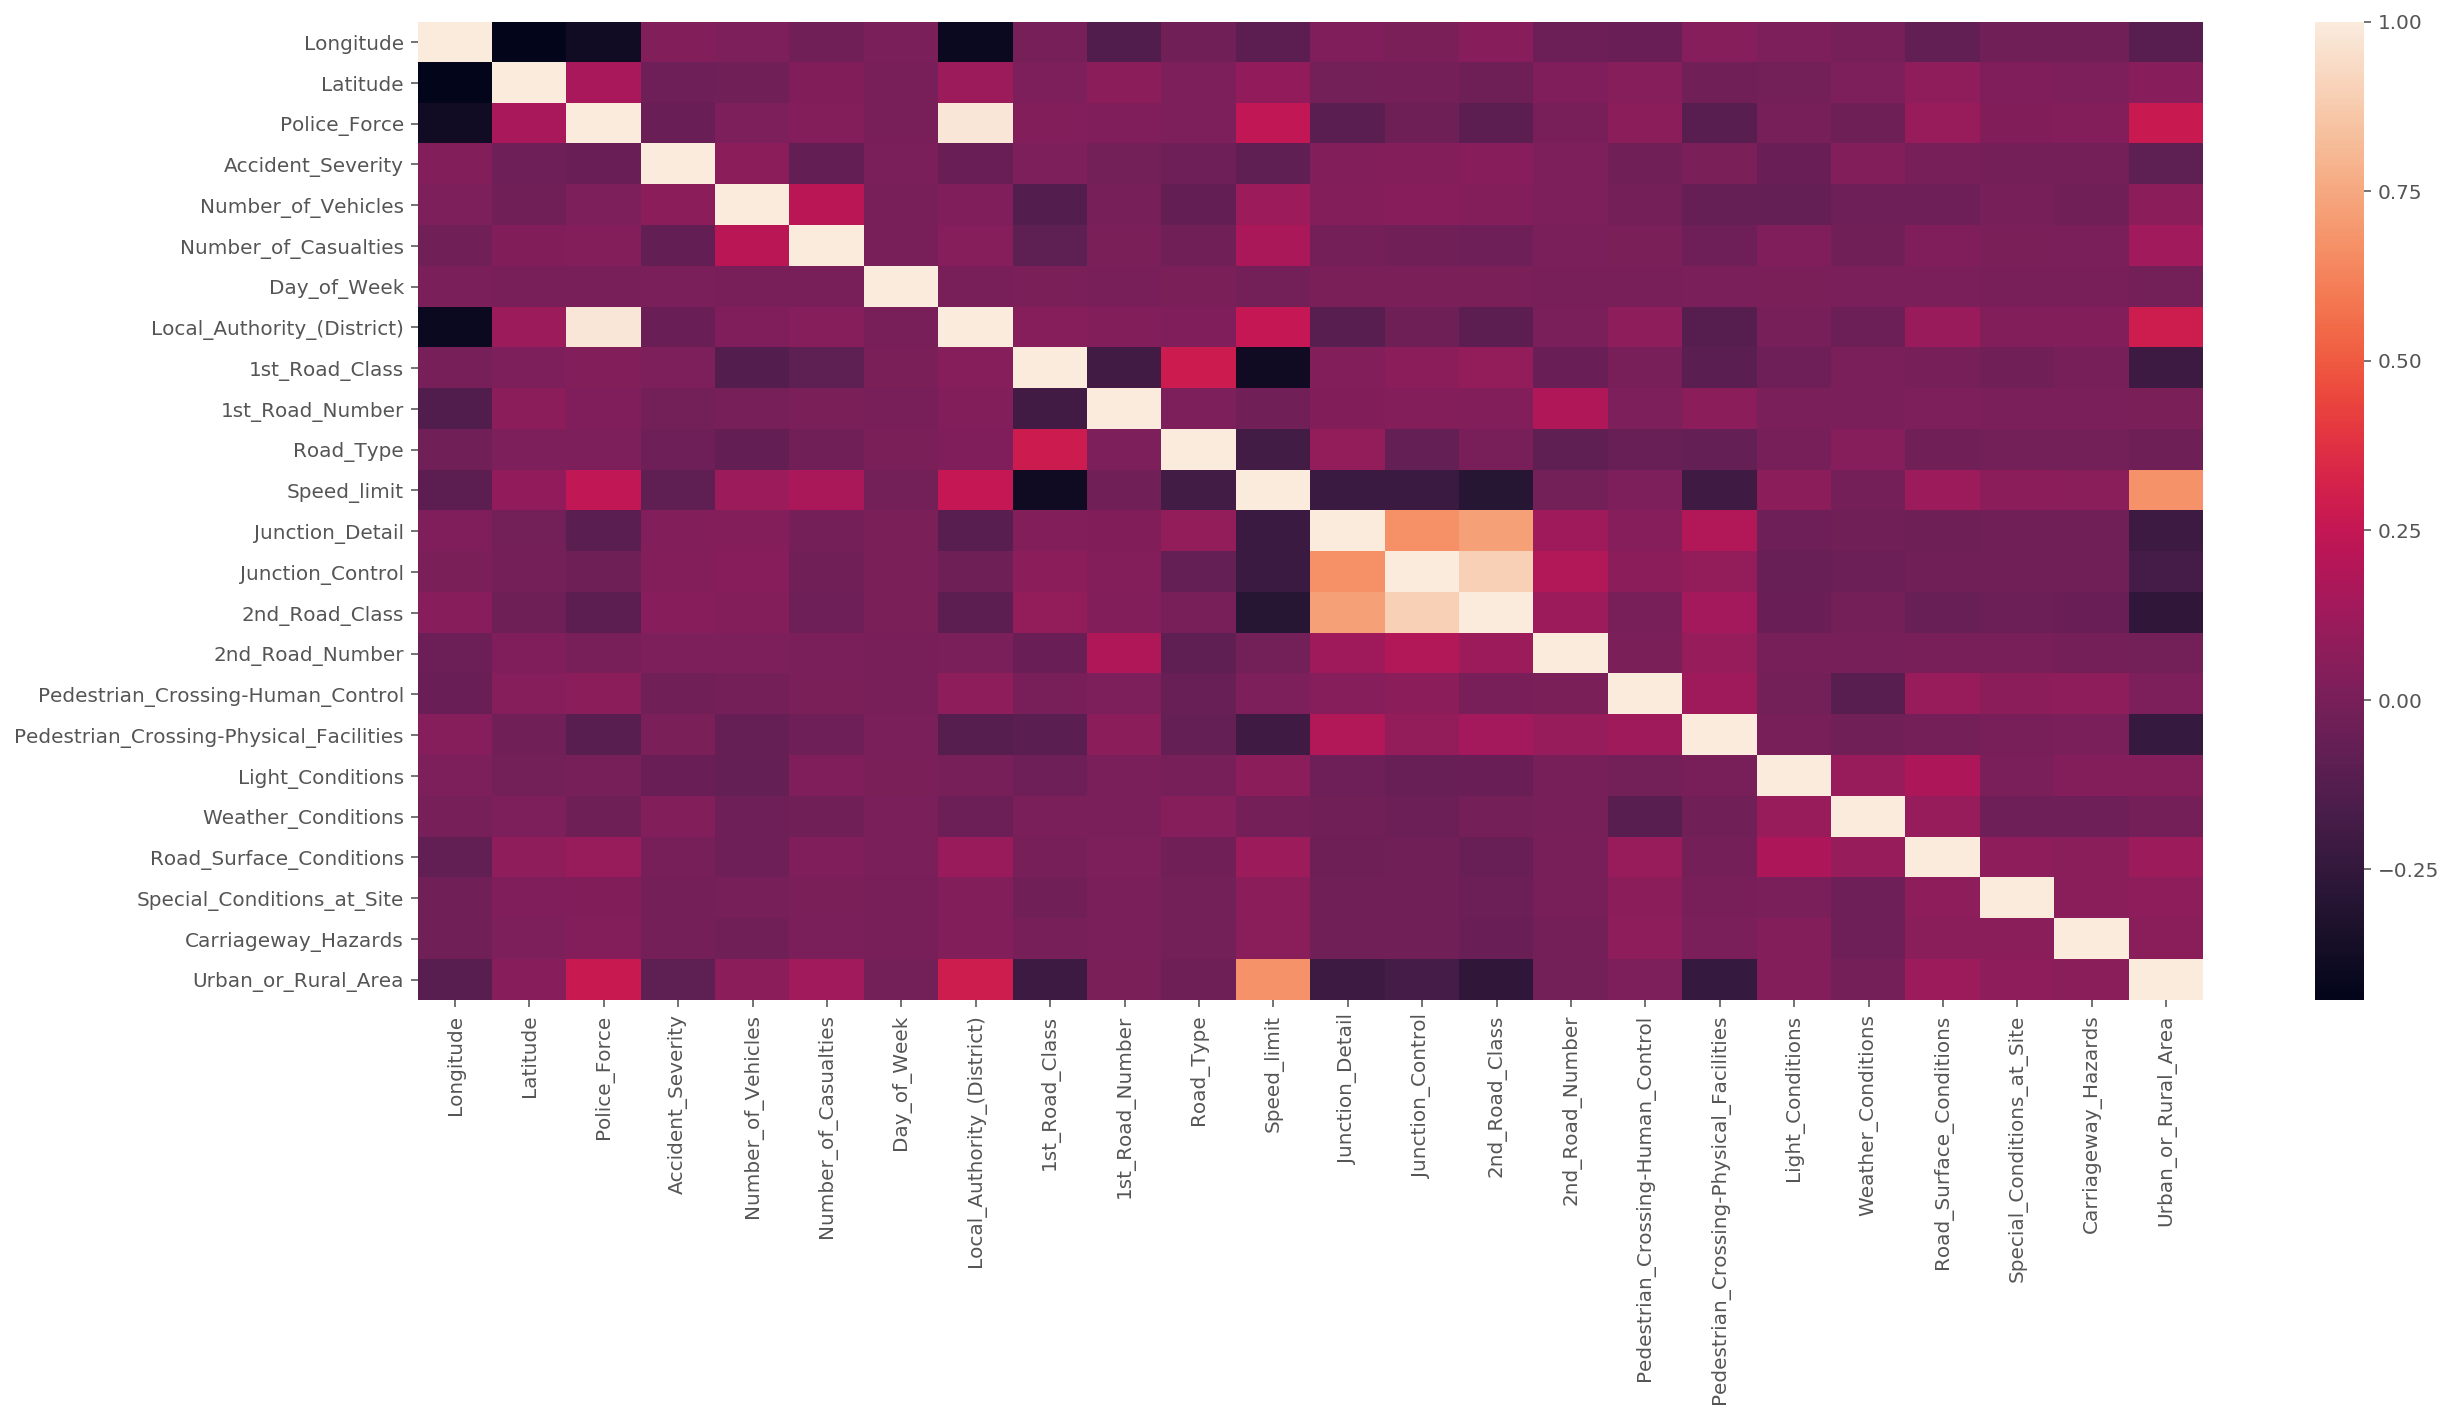

In [10]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

As can be seen in the above figure, there are not many strong correlations between any of the variables. There is only a strong correlation between speed limit and urban or rural area.

# Map Visualization

Now I would like to examine whether there are any 'hot-spots' for accidents. In order to do this I would like to create a map visualization and include a heat map on top of this. In order to do this, I will make use of the Folium API. 

In order to ensure the IBM Watson Studio can handle this, a random sample of 1000 data points will be generated.

In [11]:
!pip install folium

In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster

In [13]:
accident_data = df.sample(n=1000, random_state=42)
accident_data.dropna(subset=["Latitude","Longitude"], inplace = True)

In [14]:
m = folium.Map(location=[51.5, -0.1], zoom_start=10)

locations = list(zip(accident_data.Latitude, accident_data.Longitude))
icons = [folium.Icon(icon="car", prefix="fa")for _ in range(len(locations))]

cluster=MarkerCluster(locations=locations, icons=icons)
m.add_child(cluster)

In [15]:

def get_geojson_grid(upper_right, lower_left, n=6):
   
    all_boxes = []

    lat_steps = np.linspace(lower_left[0], upper_right[0], n+1)
    lon_steps = np.linspace(lower_left[1], upper_right[1], n+1)

    lat_stride = lat_steps[1] - lat_steps[0]
    lon_stride = lon_steps[1] - lon_steps[0]

    for lat in lat_steps[:-1]:
        for lon in lon_steps[:-1]:
            
            upper_left = [lon, lat + lat_stride]
            upper_right = [lon + lon_stride, lat + lat_stride]
            lower_right = [lon + lon_stride, lat]
            lower_left = [lon, lat]

            
            coordinates = [
                upper_left,
                upper_right,
                lower_right,
                lower_left,
                upper_left
            ]

            geo_json = {"type": "FeatureCollection",
                        "properties":{
                            "lower_left": lower_left,
                            "upper_right": upper_right
                        },
                        "features":[]}

            grid_feature = {
                "type":"Feature",
                "geometry":{
                    "type":"Polygon",
                    "coordinates": [coordinates],
                }
            }

            geo_json["features"].append(grid_feature)

            all_boxes.append(geo_json)

    return all_boxes
            
     

In [16]:
lower_left = [49.68, -7.669]
upper_right = [59.145, 2.77]
m = folium.Map(zoom_start = 5, location=[55, 0])
grid = get_geojson_grid(upper_right, lower_left , n=6)

for i, geo_json in enumerate(grid):

    color = plt.cm.Reds(i / len(grid))
    color = mpl.colors.to_hex(color)

    gj = folium.GeoJson(geo_json,
                        style_function=lambda feature, color=color: {
                                                                        'fillColor': color,
                                                                        'color':"black",
                                                                        'weight': 2,
                                                                        'dashArray': '5, 5',
                                                                        'fillOpacity': 0.55,
                                                                    })
    popup = folium.Popup("example popup {}".format(i))
    gj.add_child(popup)

    m.add_child(gj)
m

In [17]:
m = folium.Map(zoom_start = 5, location=[55, 0])

top_right = [58, 2]
top_left = [49, -8]

grid = get_geojson_grid(top_right, top_left, n=6)

popups = []
regional_counts = []

for box in grid:
    upper_right = box["properties"]["upper_right"]
    lower_left = box["properties"]["lower_left"]

    mask = (
        (accident_data.Latitude < upper_right[1]) & (accident_data.Latitude > lower_left[1]) &
        (accident_data.Longitude < upper_right[0]) & (accident_data.Longitude > lower_left[0])
           )

    region_incidents = len(accident_data[mask])
    regional_counts.append(region_incidents)

    total_vehicles = accident_data[mask].Number_of_Vehicles.sum()
    total_casualties = accident_data[mask].Number_of_Casualties.sum()
    content = "total vehicles {:,.0f}, total casualties {:,.0f}".format(total_vehicles, total_casualties)
    popup = folium.Popup(content)
    popups.append(popup)

worst_region = max(regional_counts)

for i, box in enumerate(grid):
    geo_json = json.dumps(box)

    color = plt.cm.Reds(regional_counts[i] / worst_region)
    color = mpl.colors.to_hex(color)

    gj = folium.GeoJson(geo_json,
                        style_function=lambda feature, color=color: {
                                                                        'fillColor': color,
                                                                        'color':"black",
                                                                        'weight': 2,
                                                                        'dashArray': '5, 5',
                                                                        'fillOpacity': 0.55,
                                                                    })

    gj.add_child(popups[i])
    m.add_child(gj)

locations = list(zip(accident_data.Latitude, accident_data.Longitude))
icons = [folium.Icon(icon="car", prefix="fa") for _ in range(len(locations))]

popup_content = []
for incident in accident_data.itertuples():
    number_of_vehicles = "Number of vehicles: {} ".format(incident.Number_of_Vehicles)
    number_of_casualties = "Number of casualties: {}".format(incident.Number_of_Casualties)
    content = number_of_vehicles + number_of_casualties
    popup_content.append(content)

popups = [folium.Popup(content) for content in popup_content]

cluster = MarkerCluster(locations=locations, icons=icons, popups=popups)
m.add_child(cluster)

m

As can clearly be seen in the above visualization, the main 'hot-spots' are in the south of England, with London especially being a high risk area.

# Week 3 - Creating a Predictive Model

Now I will attempty to analyse UK Traffic Accidents and create a model that will predict accident severity. In order to do this, I will examine which factors and their relevant values play a role in the severity of road accidents. 

First I will import the necessary APIs

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

Now I will locally upload the csv data into a dataframe df

In [2]:
# The code was removed by Watson Studio for sharing.

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In order to clean up the data I will drop the factors that are definitely unnecesary in the analysis

In [3]:
drop = ['Location_Easting_OSGR', 'Location_Northing_OSGR' , 'Did_Police_Officer_Attend_Scene_of_Accident' , 'LSOA_of_Accident_Location']
df.drop(drop, axis=1, inplace = True)
df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,2018010080971,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,...,-1,0,0,0,4,1,1,0,0,1
1,2018010080973,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,...,6,0,0,0,4,1,1,0,0,1
2,2018010080974,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,...,5,0,0,5,4,1,1,0,0,1
3,2018010080981,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,...,3,124,0,5,4,2,2,0,0,1
4,2018010080982,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,...,-1,0,0,0,4,1,2,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 28 columns):
Accident_Index                             122635 non-null object
Longitude                                  122580 non-null float64
Latitude                                   122580 non-null float64
Police_Force                               122635 non-null int64
Accident_Severity                          122635 non-null int64
Number_of_Vehicles                         122635 non-null int64
Number_of_Casualties                       122635 non-null int64
Date                                       122635 non-null object
Day_of_Week                                122635 non-null int64
Time                                       122622 non-null object
Local_Authority_(District)                 122635 non-null int64
Local_Authority_(Highway)                  122635 non-null object
1st_Road_Class                             122635 non-null int64
1st_Road_Number                     

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

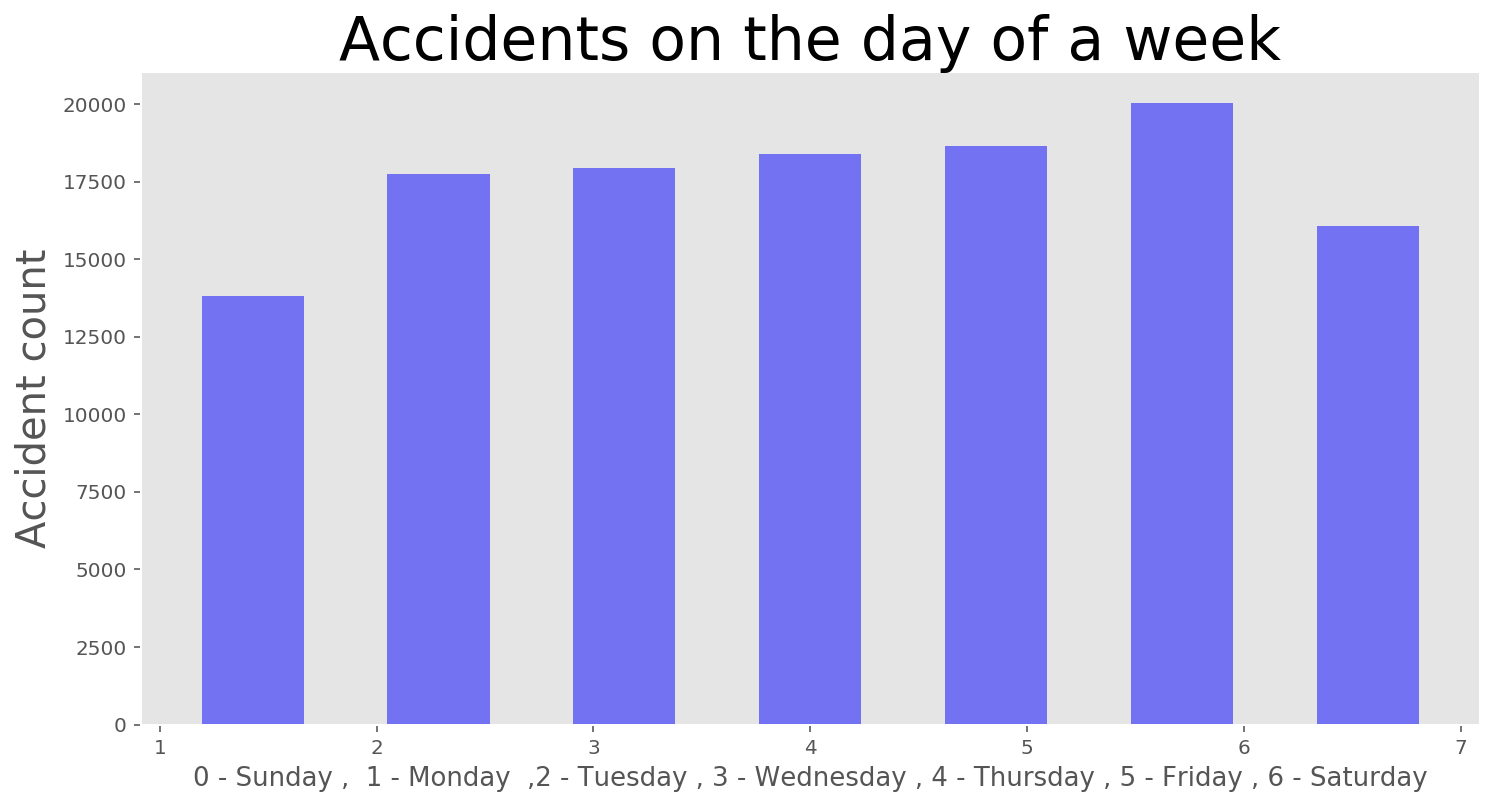

In [5]:
plt.figure(figsize=(12,6))
df.Day_of_Week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

Text(0.5, 0, '1 - Fine no high winds ,  2 - Raining no high winds  ,3 - Snowing no high winds , 4 - Fine + High Winds , 5 - Raining + high winds , 6 - Snowing + High Winds, 7 - Fog or mist')

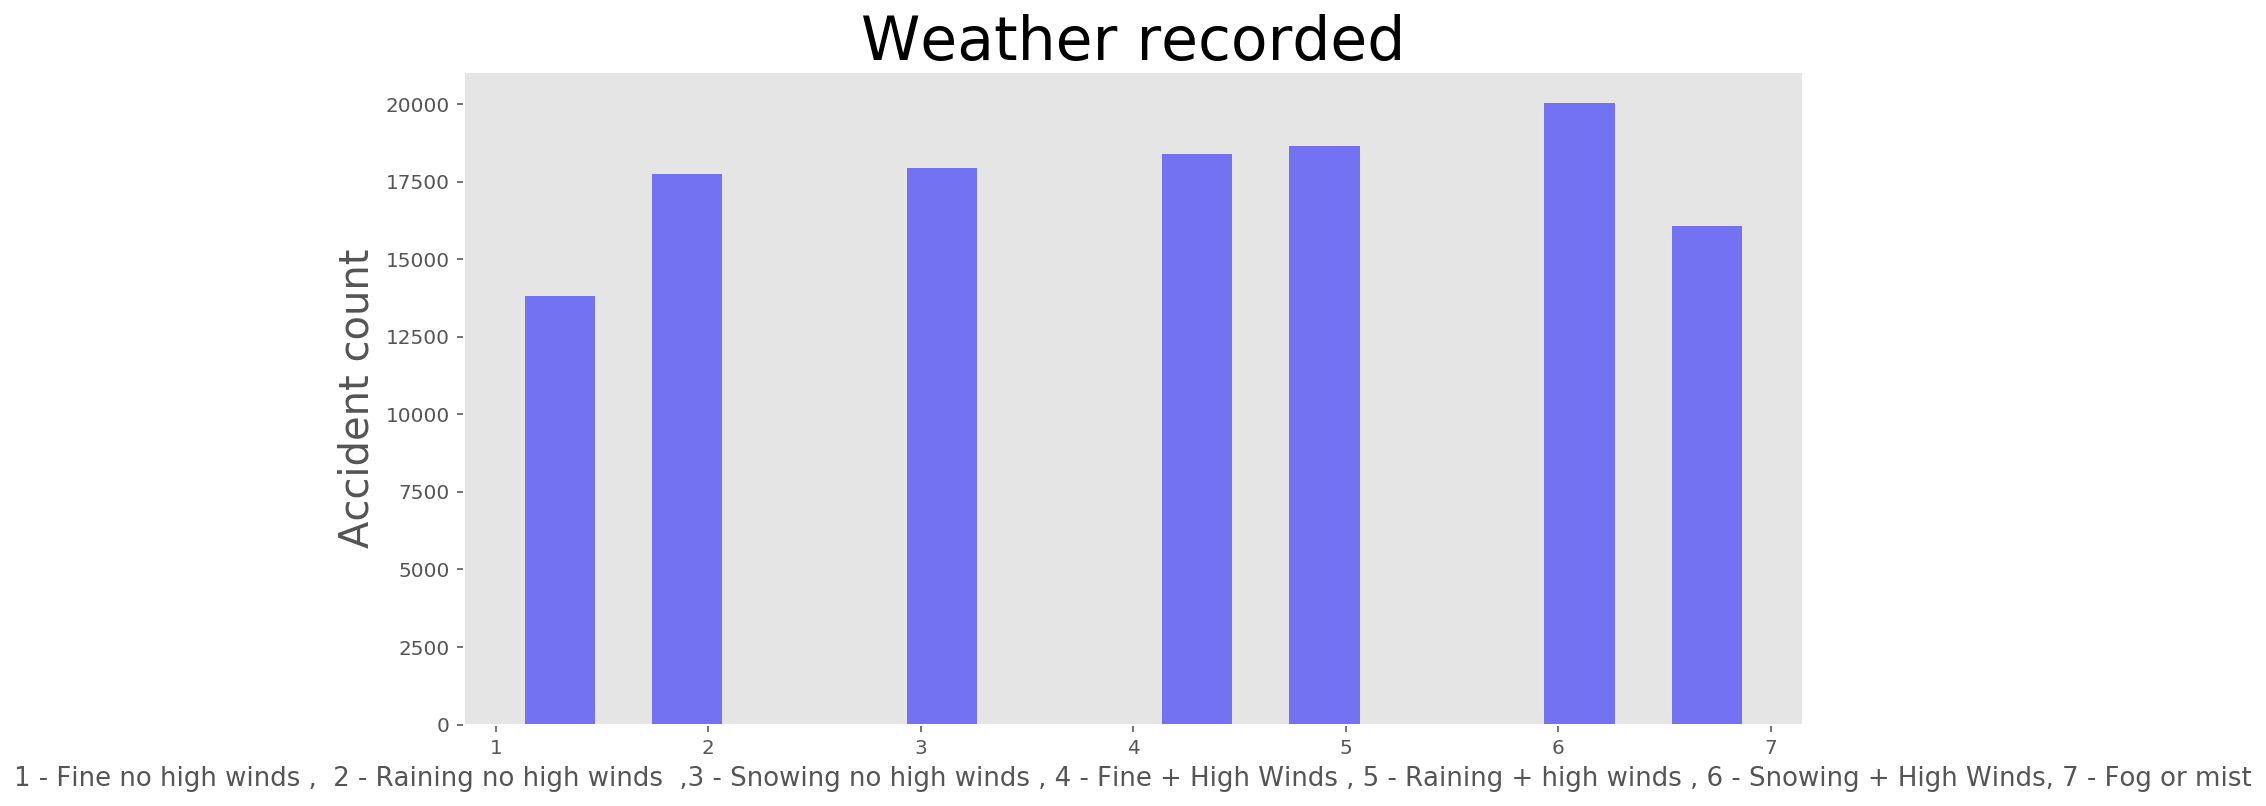

In [6]:
plt.figure(figsize=(12,6))
df.Day_of_Week.hist(bins=10,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Weather recorded' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('1 - Fine no high winds ,  2 - Raining no high winds  ,3 - Snowing no high winds , 4 - Fine + High Winds , 5 - Raining + high winds , 6 - Snowing + High Winds, 7 - Fog or mist' , fontsize = 13)

# Machine Learning 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

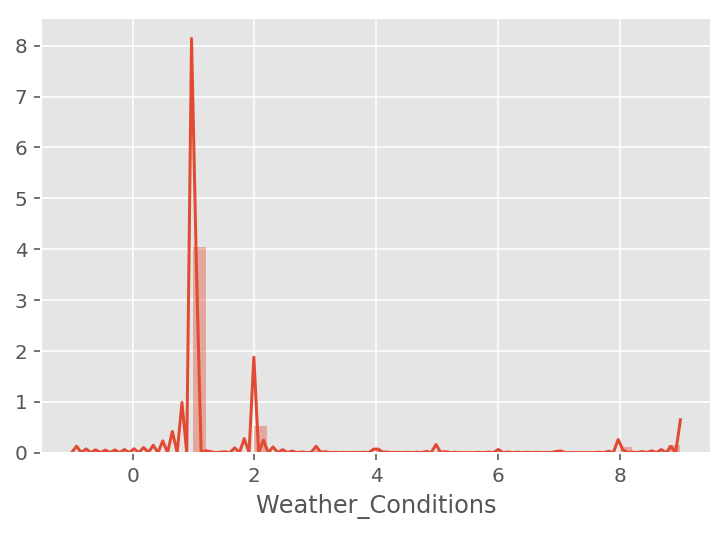

<Figure size 432x288 with 0 Axes>

In [8]:
sns.distplot(df['Weather_Conditions']);
fig = plt.figure()

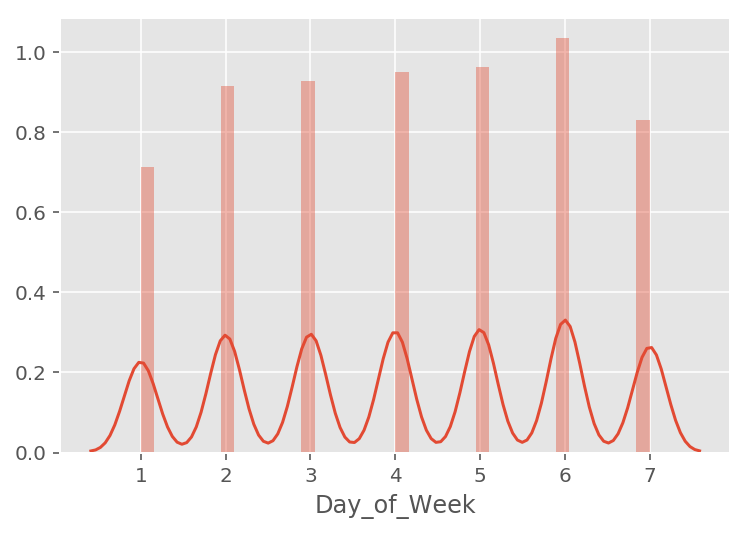

<Figure size 432x288 with 0 Axes>

In [9]:
sns.distplot(df['Day_of_Week']);
fig = plt.figure()

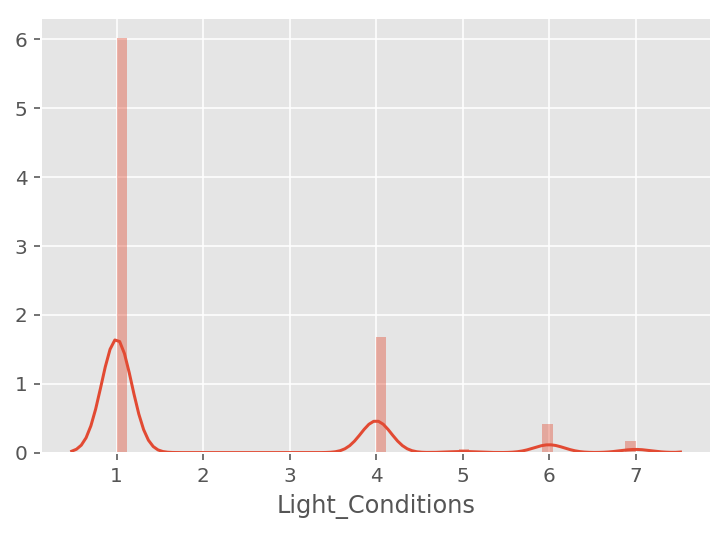

<Figure size 432x288 with 0 Axes>

In [10]:
sns.distplot(df['Light_Conditions']);
fig = plt.figure()

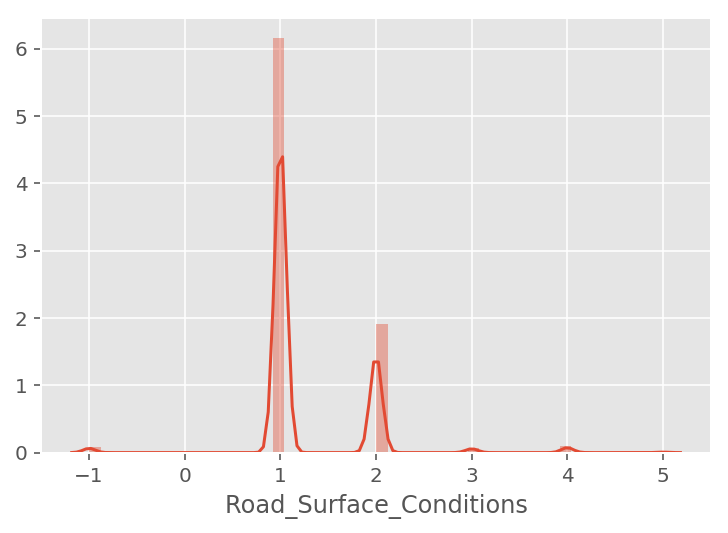

<Figure size 432x288 with 0 Axes>

In [11]:
sns.distplot(df['Road_Surface_Conditions']);
fig = plt.figure()

These figures indicate that the majority of accidents take place when the weather is fine, during the day, and with dry road surface conditions. It is important to take into consideration that it is in these conditions that there are the most cars on the road.

In [12]:
deep_df = df.copy(deep = True)

In [13]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Accident_Severity']

In [14]:
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
min,-7.266148,49.912362,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,1.758123,60.763722,98.000000,24.000000,59.000000,7.000000,941.00000,6.000000,9621.000000,9.000000,...,6.000000,9620.000000,2.000000,8.000000,7.00000,9.000000,5.000000,7.000000,7.000000,3.000000
mean,-1.264938,52.432318,28.329947,1.846202,1.309553,4.098463,327.14822,4.219016,836.735671,5.175896,...,2.581033,291.798288,-0.004232,0.865381,2.00402,1.616985,1.267118,0.075712,0.046789,1.327019
50%,-1.147169,51.893531,23.000000,2.000000,1.000000,4.000000,305.00000,4.000000,41.000000,6.000000,...,3.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000


In [15]:
percentages = []
for gen in list(df["Weather_Conditions"].unique()):
    
    p = round((df["Accident_Severity"][df["Weather_Conditions"]==gen].value_counts()[1]/df["Accident_Severity"][df["Weather_Conditions"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% severity) : ", p)

1 (% severity) :  1.38
2 (% severity) :  1.26
5 (% severity) :  2.35
9 (% severity) :  0.74
4 (% severity) :  2.38
8 (% severity) :  0.81
6 (% severity) :  0.5
3 (% severity) :  1.12
7 (% severity) :  4.68


KeyError: 1

In [16]:
percentages = []
for country in list(df["Light_Conditions"].unique()):
    
    p = round((df["Accident_Severity"][df["Light_Conditions"]==country].value_counts()[1]/df["Accident_Severity"][df["Light_Conditions"]==country].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(country,"(severity) : ", p)

4 (severity) :  1.41
7 (severity) :  0.97
1 (severity) :  1.1
6 (severity) :  4.92
5 (severity) :  2.8


Text(0.5, 1.0, 'Severity')

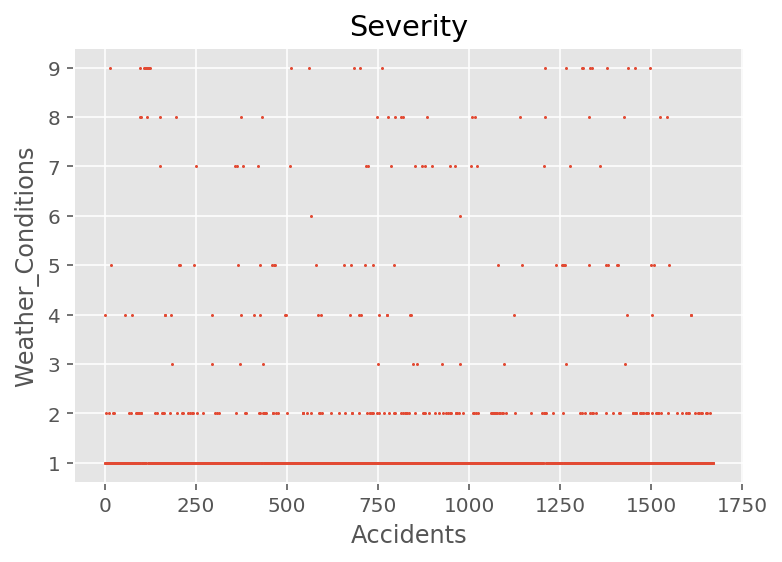

In [17]:
plt.scatter(x=range(len(list(df["Weather_Conditions"][df["Accident_Severity"]==1]))),y=df["Weather_Conditions"][df["Accident_Severity"]==1],s=1)
plt.ylabel("Weather_Conditions")
plt.xlabel("Accidents")
plt.title("Severity")

## Splitting the Data into Training Data and Test Data

In [20]:
accident_ml = df.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions']]

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              df['Accident_Severity'].values,test_size=0.20, random_state=99)

## Random Forest

In [21]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 79.63
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       334
           2   0.185185  0.001077  0.002142      4642
           3   0.797085  0.998772  0.886604     19551

   micro avg   0.796347  0.796347  0.796347     24527
   macro avg   0.327424  0.333283  0.296248     24527
weighted avg   0.670422  0.796347  0.707136     24527



Predicted,1,2,3,All
Actual,,,,
1,0,0,334,334
2,0,5,4637,4642
3,2,22,19527,19551
All,2,27,24498,24527


## Logistic Regression

In [22]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 79.71
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       334
           2   0.000000  0.000000  0.000000      4642
           3   0.797122  1.000000  0.887109     19551

   micro avg   0.797122  0.797122  0.797122     24527
   macro avg   0.265707  0.333333  0.295703     24527
weighted avg   0.635403  0.797122  0.707134     24527



Predicted,3,All
Actual,,
1,334,334
2,4642,4642
3,19551,19551
All,24527,24527


## Decision Tree

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 79.58
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       334
           2   0.215686  0.002370  0.004688      4642
           3   0.797180  0.997749  0.886259     19551

   micro avg   0.795776  0.795776  0.795776     24527
   macro avg   0.337622  0.333373  0.296982     24527
weighted avg   0.676270  0.795776  0.707343     24527



Predicted,1,2,3,All
Actual,,,,
1,0,1,333,334
2,1,11,4630,4642
3,5,39,19507,19551
All,6,51,24470,24527


It seems that the Logistic Regression did slightly better than the other two in terms of accuracy. However, looking at the predicted vs actual table, it would seem the Random Forest algorithm did better. It correctly predicted more severe (3) accidents. However, I have decided to continue with the Decision Tree model. 

## Decision Tree tuning

In [24]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 79.71
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       334
           2   0.000000  0.000000  0.000000      4642
           3   0.797122  1.000000  0.887109     19551

   micro avg   0.797122  0.797122  0.797122     24527
   macro avg   0.265707  0.333333  0.295703     24527
weighted avg   0.635403  0.797122  0.707134     24527



Predicted,3,All
Actual,,
1,334,334
2,4642,4642
3,19551,19551
All,24527,24527


## Important Features

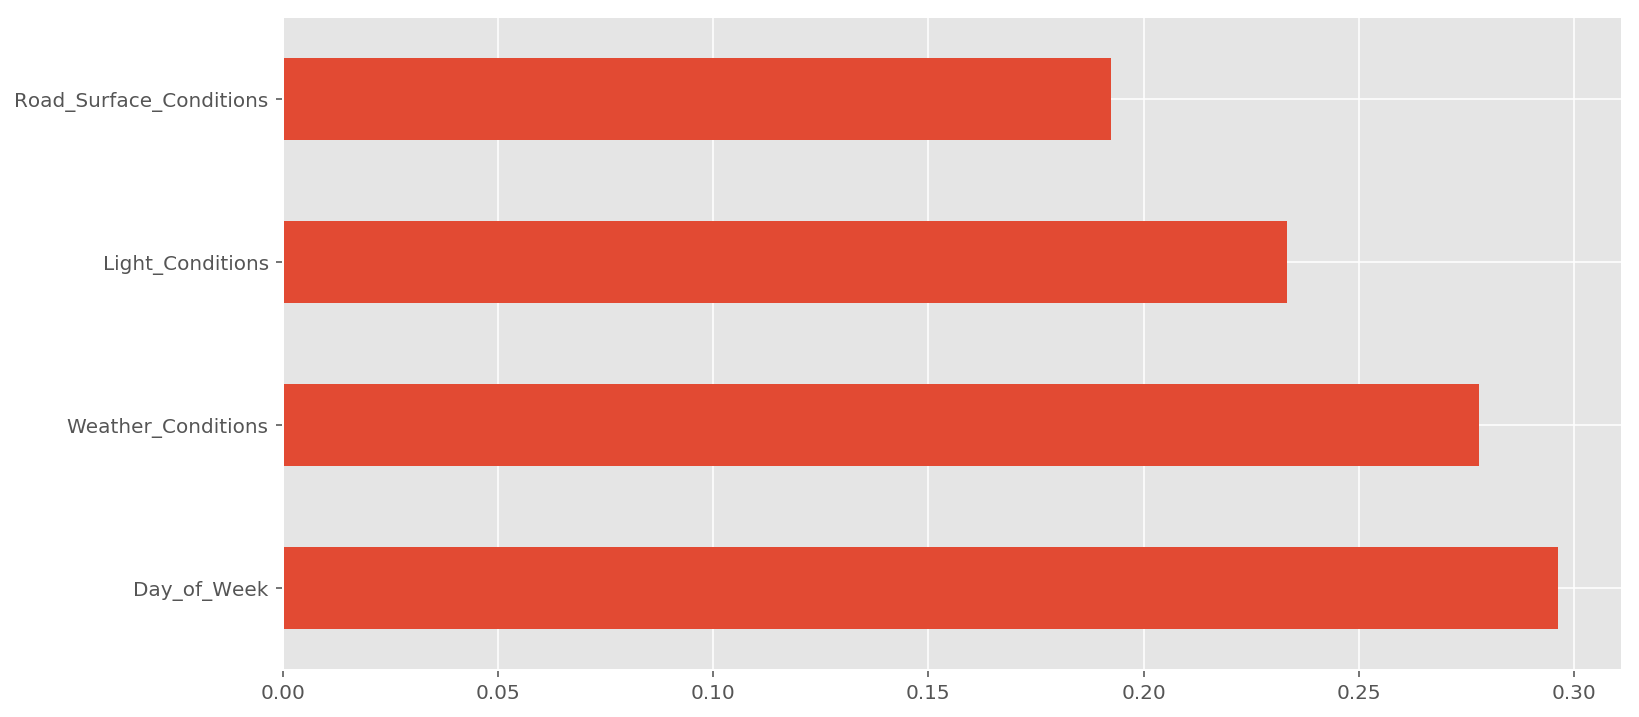

In [25]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')
